Number of rows and columns in the hologram are:  1024 1024


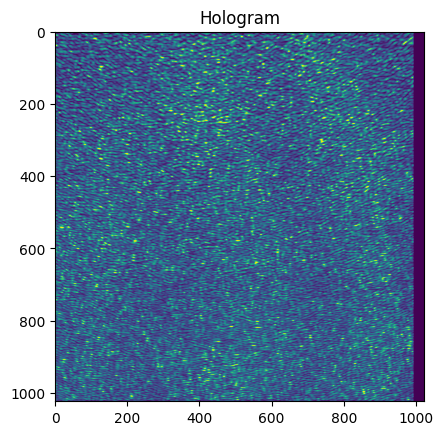

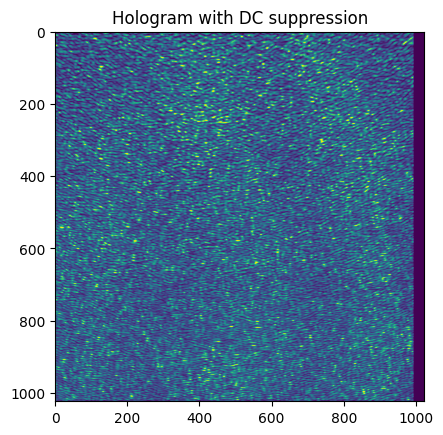

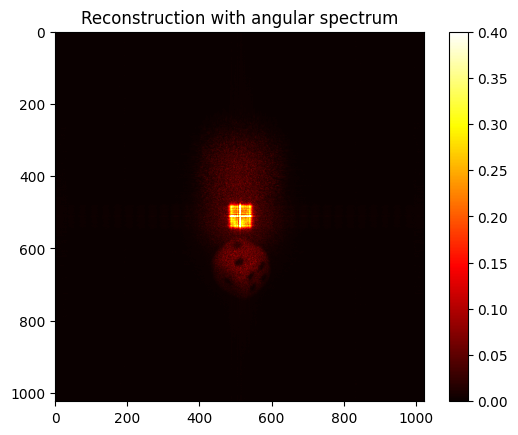

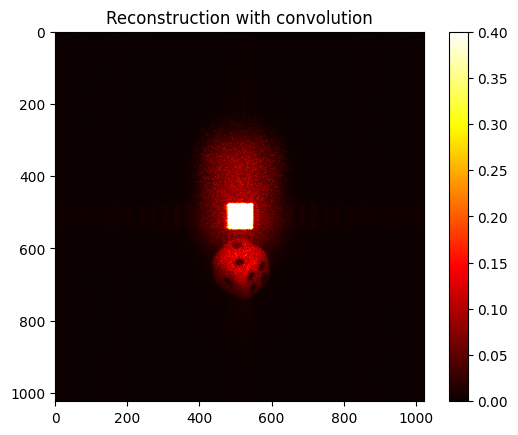

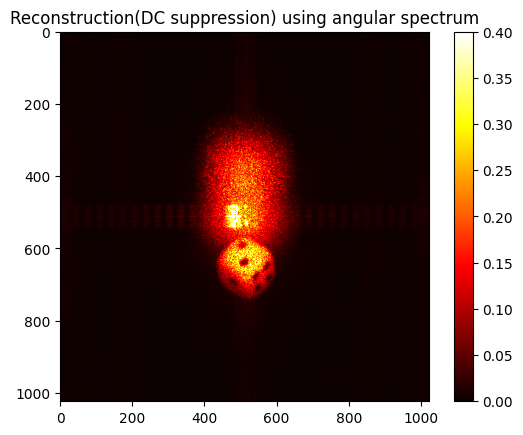

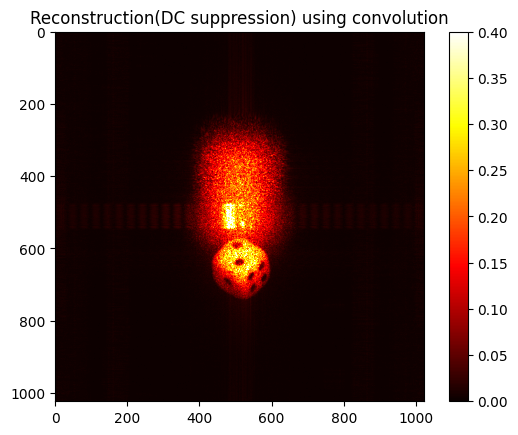

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpi
import numpy as np


# Read the hologram image file
hologram = mpi.imread("ulf7.BMP")
hologram = hologram.astype(float) #Convert into float type. Crucial for non integer based mathematical operations
plt.figure(1)
plt.title("Hologram")
plt.imshow(hologram, cmap="viridis")

# DC term suppression. It involves subtraction of the mean value of hologram from itself
hologram2 = hologram - np.mean(hologram)
plt.figure(2)
plt.title("Hologram with DC suppression")
plt.imshow(hologram2, cmap="viridis")

# prepare the Convolution operand for the hologram
Nr,Nc = np.shape(hologram) #number of rows and columns in the hologram
print("Number of rows and columns in the hologram are: ", Nr, Nc)
wavelength = 632.8e-9 #HeNe laser wavelength in SI units i.e. meters
dx = 6.8e-6 #sensor pixel size in meters
d = 1.054 #object distance in meters
m = 1/14 #magnification factor
d2 = d*m #reconstruction distance in meters
f = 1/(1/d+1/d2) #lens responsible for imaging an object kept at d distance to an image at d2 distance 
Nr = np.linspace(0, Nr-1, Nr)-Nr/2
Nc = np.linspace(0, Nc-1, Nc)-Nc/2 
Fr = np.linspace(-0.5, 0.5-(1/(Nr.size)), Nr.size) #frequency in x direction
Fc = np.linspace(-0.5, 0.5-(1/(Nc.size)), Nc.size) #frequency in y direction
x, y = np.meshgrid(Nc,Nr)
fx, fy = np.meshgrid(Fr, Fc) #frequency in x and y direction
x = x*dx; y = y*dx; fx = fx/dx; fy = fy/dx

L = np.exp(1j*np.pi/(f*wavelength)*(np.multiply(x, x) + np.multiply(y, y)))
field = np.multiply(hologram, L) #hologram multiplied by conjugate field
field2 = np.multiply(hologram2, L) #DC term suppressed hologram multiplied by conjugate field

# angular spectrum method
k=2*np.pi/wavelength #wave number
z = d2 #reconstruction distance in meters
alpha = np.sqrt(k**2 - 4*np.pi**2 * (fx**2 + fy**2))
G = np.exp(-1j*alpha*z)
G[alpha<0] = 0 #setting negative values to zero

reconstructed_field1 = np.fft.fftshift(np.fft.ifft2(np.fft.fft2(field) * G))
reconstructed_field2 = np.fft.fftshift(np.fft.ifft2(np.fft.fft2(field2) * G)) # DC term suppressed

# convolution method
rho = np.sqrt(d2**2 + np.multiply(x, x) + np.multiply(y, y))
g = 1j/wavelength*np.exp(-1j*2*np.pi/wavelength*rho)/(rho)

reconstructed_field3 = np.fft.fftshift( np.fft.ifft2(np.multiply(np.fft.fft2(field), np.fft.fft2(g))) ) 
reconstructed_field4 = np.fft.fftshift( np.fft.ifft2(np.multiply(np.fft.fft2(field2), np.fft.fft2(g))) ) # DC term suppressed 


# save and plot the reconstructed field
I1 = np.abs(reconstructed_field1)/np.max(np.abs(reconstructed_field1)) #normalized intensity profile
I3 = np.abs(reconstructed_field3)/np.max(np.abs(reconstructed_field3)) #normalized intensity profile
plt.figure(3)
plt.title("Reconstruction with angular spectrum")
plt.imshow(I1, cmap="hot", clim=(0.0, 0.4))
plt.colorbar()
plt.figure(4)
plt.title("Reconstruction with convolution")
plt.imshow(I3, cmap="hot", clim=(0.0, 0.4))
plt.colorbar()
mpi.imsave('Angular_spectrum_reconstruction.png', I1, cmap="hot", vmin=0.0, vmax=0.3) #save reconstruction matrix as image
mpi.imsave('Convolution_reconstruction.png', I3, cmap="hot", vmin=0.0, vmax=0.3) #save reconstruction matrix as image
  

# save and plot DC suppressed reconstructed field
I2 = np.abs(reconstructed_field2)/np.max(np.abs(reconstructed_field2)) #normalized intensity profile
I4 = np.abs(reconstructed_field4)/np.max(np.abs(reconstructed_field4)) #normalized intensity profile    
plt.figure(5)
plt.title("Reconstruction(DC suppression) using angular spectrum")
plt.imshow(I2, cmap="hot", clim=(0.0, 0.4))
plt.colorbar()
plt.figure(6)
plt.title("Reconstruction(DC suppression) using convolution")
plt.imshow(I4, cmap="hot", clim=(0.0, 0.4))
plt.colorbar()
mpi.imsave('Angular_spectrum_reconstruction_DCsuppressed.png', I2, cmap="hot", vmin=0.0, vmax=0.6) #save reconstruction matrix as image
mpi.imsave('Convolution_reconstruction_DCsuppressed.png', I4, cmap="hot", vmin=0.0, vmax=0.6) #save reconstruction matrix as image

plt.show()